In [2]:
import sys
from pathlib import Path

# add repo root (parent of "notebooks/") to Python path
sys.path.insert(0, str(Path("..").resolve()))


In [3]:
from ecg_artifact_benchmark.windowing import WindowConfig, window_record
import numpy as np
import matplotlib.pyplot as plt

cfg = WindowConfig(window_sec=5.0, overlap=0.5, lead=0)
x, fs, meta, win_df = window_record("100", cfg, pn_dir="mitdb")
win_df.head(), meta


(  record   fs  win_id  start   end  start_sec  end_sec  duration_sec
 0    100  360       0      0  1800        0.0      5.0           5.0
 1    100  360       1    900  2700        2.5      7.5           5.0
 2    100  360       2   1800  3600        5.0     10.0           5.0
 3    100  360       3   2700  4500        7.5     12.5           5.0
 4    100  360       4   3600  5400       10.0     15.0           5.0,
 {'record': '100',
  'fs': 360,
  'n_samples': 650000,
  'n_channels': 2,
  'sig_name': ['MLII', 'V5'],
  'units': ['mV', 'mV']})

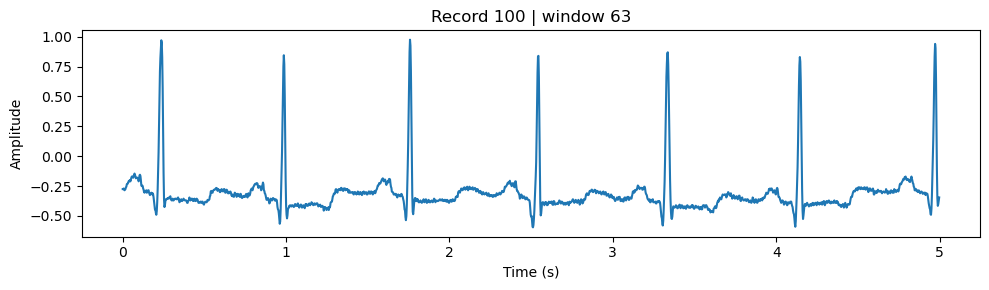

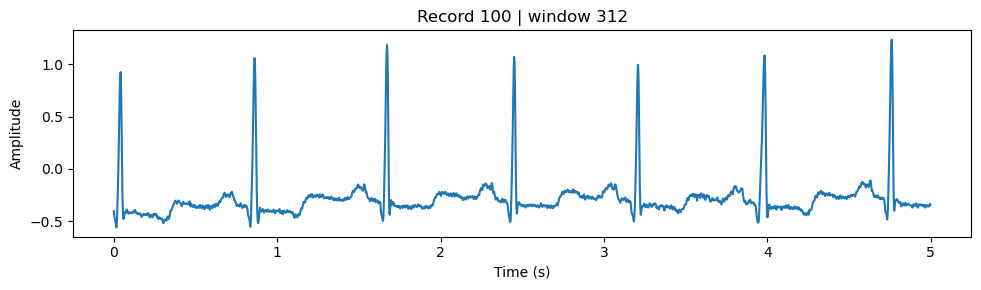

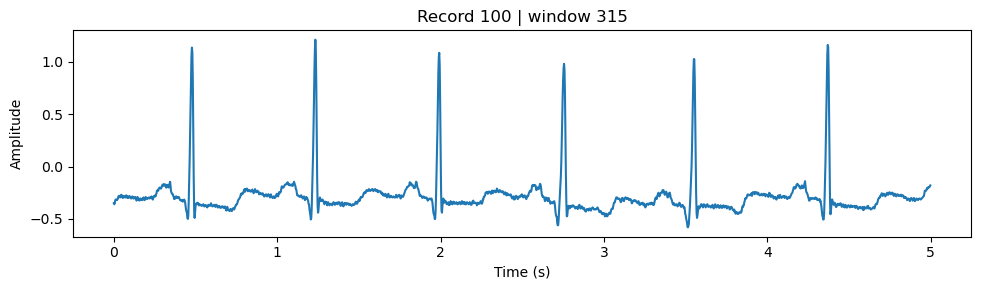

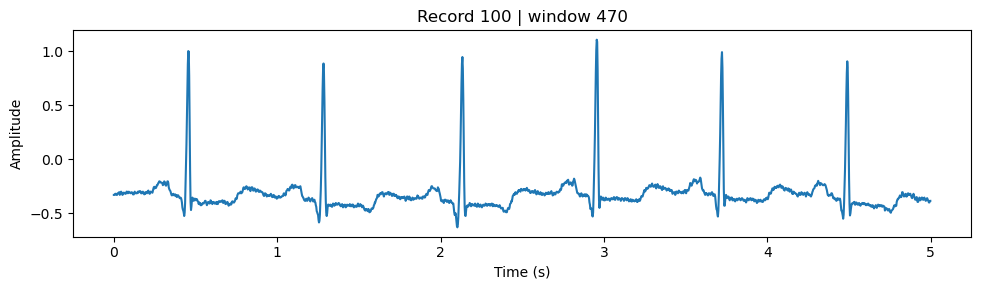

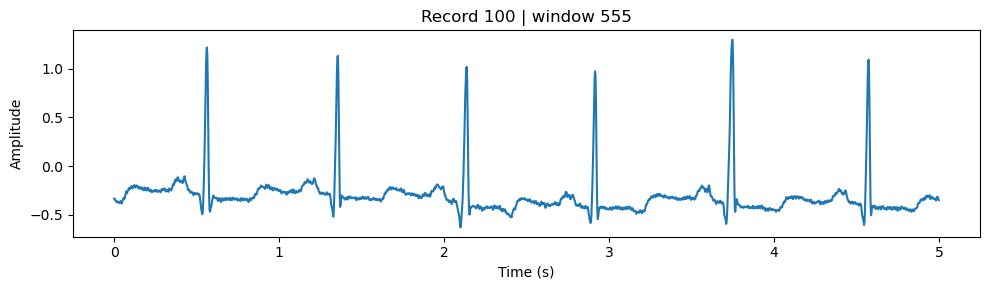

In [4]:
rng = np.random.default_rng(42)
chosen = rng.choice(win_df["win_id"], size=5, replace=False)

for win_id in sorted(chosen):
    row = win_df.loc[win_df["win_id"] == win_id].iloc[0]
    s, e = int(row.start), int(row.end)
    seg = x[s:e]
    t = np.arange(len(seg)) / fs

    plt.figure(figsize=(10, 3))
    plt.plot(t, seg)
    plt.title(f"Record 100 | window {win_id}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()
